In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import itertools
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
from get_clean_data_DTR import get_data, clean_data, get_feats, get_target

In [3]:
def get_clean_feats(year):
    prelim_df = get_data(year)
    df = clean_data(prelim_df, year)
    feats = get_feats(df, year)
    X = feats[['eir','fndng_tgt_{}'.format(year), 'tgt_nrml_cost_{}'.format(year), 'pmts_to_part_{}'.format(year)]]
    X['eir_ft'] = X['eir']/100 * X['fndng_tgt_{}'.format(year)]
    X['eir_tnc'] = X['eir']/100 * X['tgt_nrml_cost_{}'.format(year)]
    X['eir_pmt'] = X['eir']/100 * X['pmts_to_part_{}'.format(year)]
    y = get_target(df, year)
    return X, y

<h3>Features:</h3>
    <ul><li>Prior year funding target
        <li>Prior year target normal cost (expected growth in funding target)
        <li>Prior year benefits paid
        <li>Prior year effective interest rate (single effective rate that approximates the effect of 3-tiered rates actually used to value funding target
    </ul>

<h3>Interaction Features: Interest on FT, TNC, Pmts</h3>

In [4]:
X,y = get_clean_feats(2014)

<h2>Fit a Linear Regression</h2>

In [5]:
linreg = LinearRegression().fit(X,y)

In [6]:
linreg.score(X,y)

0.9787071198932028

In [7]:
linreg.coef_

array([ 6.53180415e+06,  1.28506859e+00, -1.34570246e+00, -1.85815946e+00,
       -3.51656020e+00,  4.97560357e+01,  1.65570739e+01])

In [8]:
colors = itertools.cycle(["c", "m", "y"])
def plot_results(y_true, y_pred):
    plt.figure(figsize=(20,8))
    #xx = np.linspace(0, len(y_true), num=len(y_true)
    plt.scatter(y_true,y_pred, s=20, color=next(colors), label="data")
    #plt.plot(xx, y_pred, color="cornflowerblue", label="max_depth=4", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("Funding Target")
    plt.title("Predicting Funding Target from Linear Regression trained on 2014 data")
    plt.legend()
    plt.show()
    return

def plot_resid(y_true, y_pred):
    resid = y_true - y_pred

    plt.figure(figsize=(20,8))
    xx = np.linspace(0, len(y_true), num=len(y_true))
    plt.scatter(xx, resid, s=20, c="blue", label="residuals")
    plt.xlabel("data")
    plt.ylabel("residual")
    plt.title("Residuals of Predictions vs Actuals (Linear Regerssion)")
    plt.legend()
    plt.show()
    return

<h1>Test on 2015 Data</h1>

In [9]:
X15, y15 = get_clean_feats(2015)

In [10]:
linreg.score(X15,y15)

0.9976480601916614

In [11]:
yhat_15 = linreg.predict(X15)

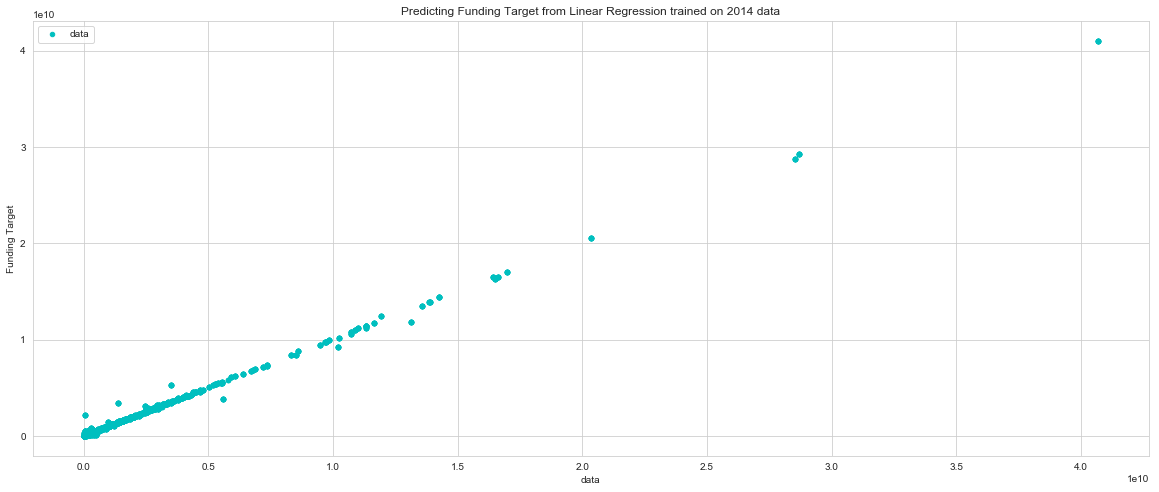

In [12]:
plot_results(y15, yhat_15)

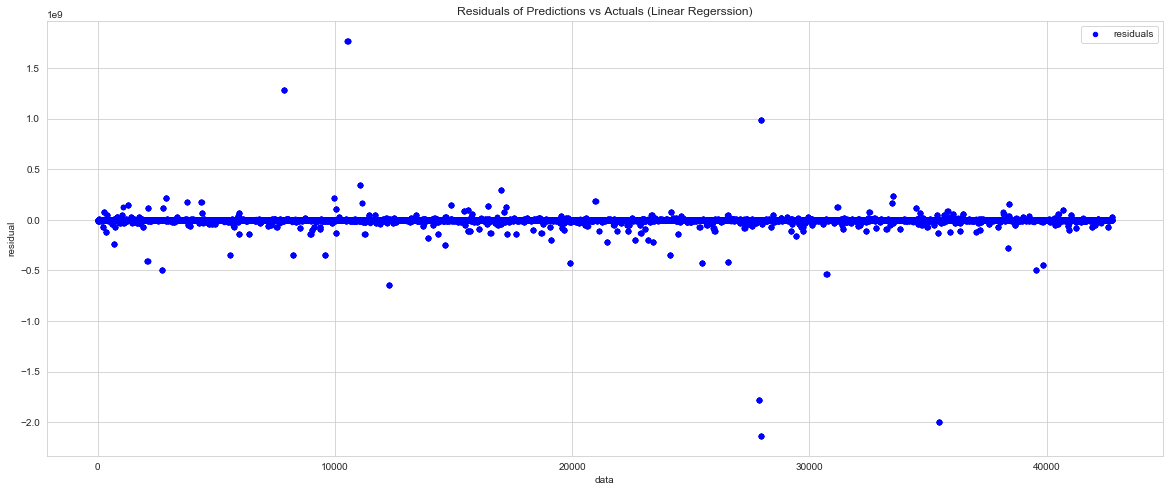

In [13]:
plot_resid(y15, yhat_15)

<h1>Test on 2016 Data</h1>

In [14]:
X16, y16 = get_clean_feats(2016)

In [15]:
linreg.score(X16,y16)

0.998456404045457

In [16]:
yhat_16 = linreg.predict(X16)

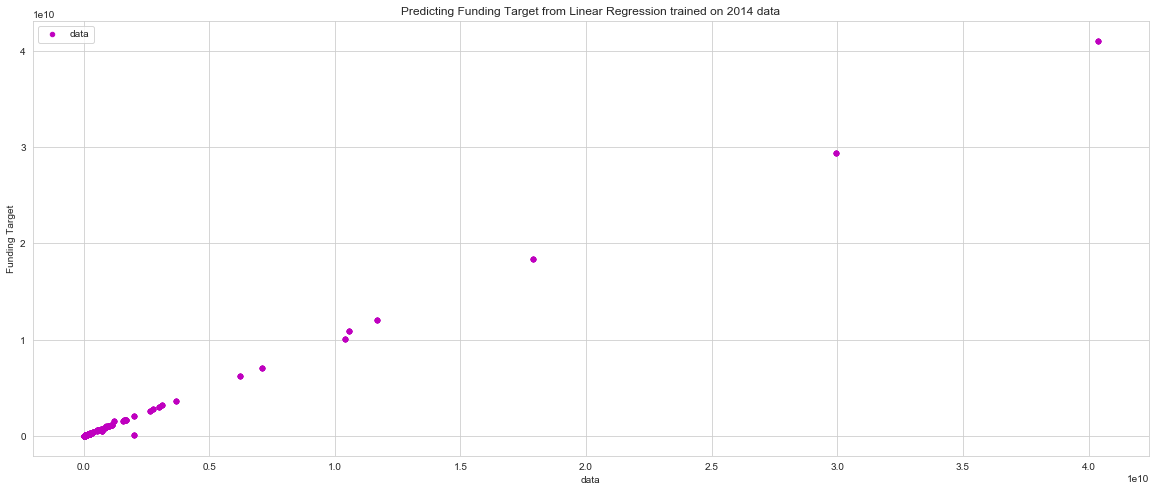

In [17]:
plot_results(y16,yhat_16)

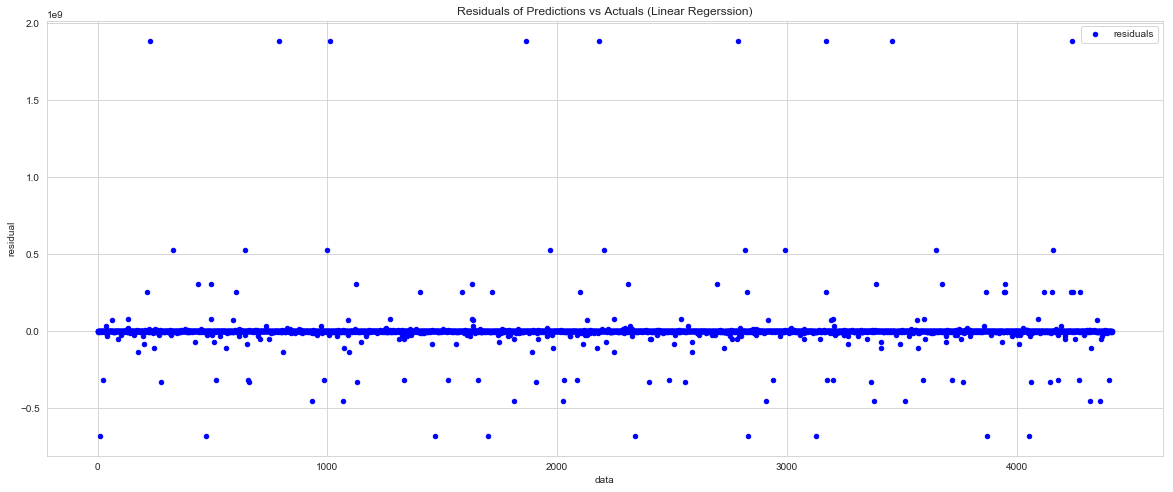

In [18]:
plot_resid(y16, yhat_16)